# Lab Sheet 3 : Data Preprocessing

# Exercise 1 Generate Dataset 

To generate a dataset in Python, you can use various libraries such as NumPy and Pandas. A sample code is below:

In [2]:
import numpy as np 
import pandas as pd 
# Set a random seed for reproducibility 
np.random.seed(42) 
# Generate random data for three features: Age, Income, and Score n
num_samples = 100    # Number of data points 
age = np.random.randint(18, 65, size=num_samples)   
income = np.random.normal(50000, 10000, size=num_samples)   
score = np.random.uniform(0, 100, size=num_samples)   
# Create a DataFrame to store the data 
data = pd.DataFrame({ 'Age': age, 'Income': income, 'Score': score }) 
# Print the first few rows of the dataset 
print(data.head())

   Age        Income      Score
0   56  56363.051083  17.495493
1   46  40932.793314  98.216834
2   32  54760.425874  51.663589
3   60  63036.612684  26.082917
4   25  52115.870123  99.625370


## 1. Generate a dataset with the Employee Information with the following features. Include some missing values too.

In [3]:

import numpy as np
import pandas as pd

np.random.seed(42)
num_samples = 100

employee_ids = range(1, num_samples + 1)
employee_names = ["Employee" + str(i) for i in range(1, num_samples + 1)]
departments = ["Sales", "Marketing", "HR", "Finance"]
department_choices = np.random.choice(departments, num_samples)

income = np.random.randint(5000, 50000, num_samples).astype(float)
income[np.random.choice(num_samples, 10, replace=False)] = np.nan

data = {
    'Employee ID': employee_ids,
    'Employee Names': employee_names,
    'Department': department_choices,
    'Salary': income
}

df = pd.DataFrame(data)
print(df.head())


   Employee ID Employee Names Department   Salary
0            1      Employee1         HR  11873.0
1            2      Employee2    Finance  10675.0
2            3      Employee3      Sales   5161.0
3            4      Employee4         HR      NaN
4            5      Employee5         HR  31557.0


## 2. Find the Count/percentage of missing values in every column of the dataset. 


In [4]:
print("Count:")
mc=df.isnull().sum()
print(mc)
print("Percentage:")
mcpercentage=(df.isnull().sum()/len(df))*100
print(mcpercentage)

Count:
Employee ID        0
Employee Names     0
Department         0
Salary            10
dtype: int64
Percentage:
Employee ID        0.0
Employee Names     0.0
Department         0.0
Salary            10.0
dtype: float64


# Exercise II Missing Value Imputation 

## For the titanic dataset use Missingno library to visualize the missing values. You can use msno.bar(data), msno.matrix(data)

In [8]:
import pandas as pd
df = pd.read_csv("./titanic_dataset.csv")

In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 3. For the titanic dataset use Missingno library to visualize the missing values. You can use msno.bar(data), msno.matrix(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


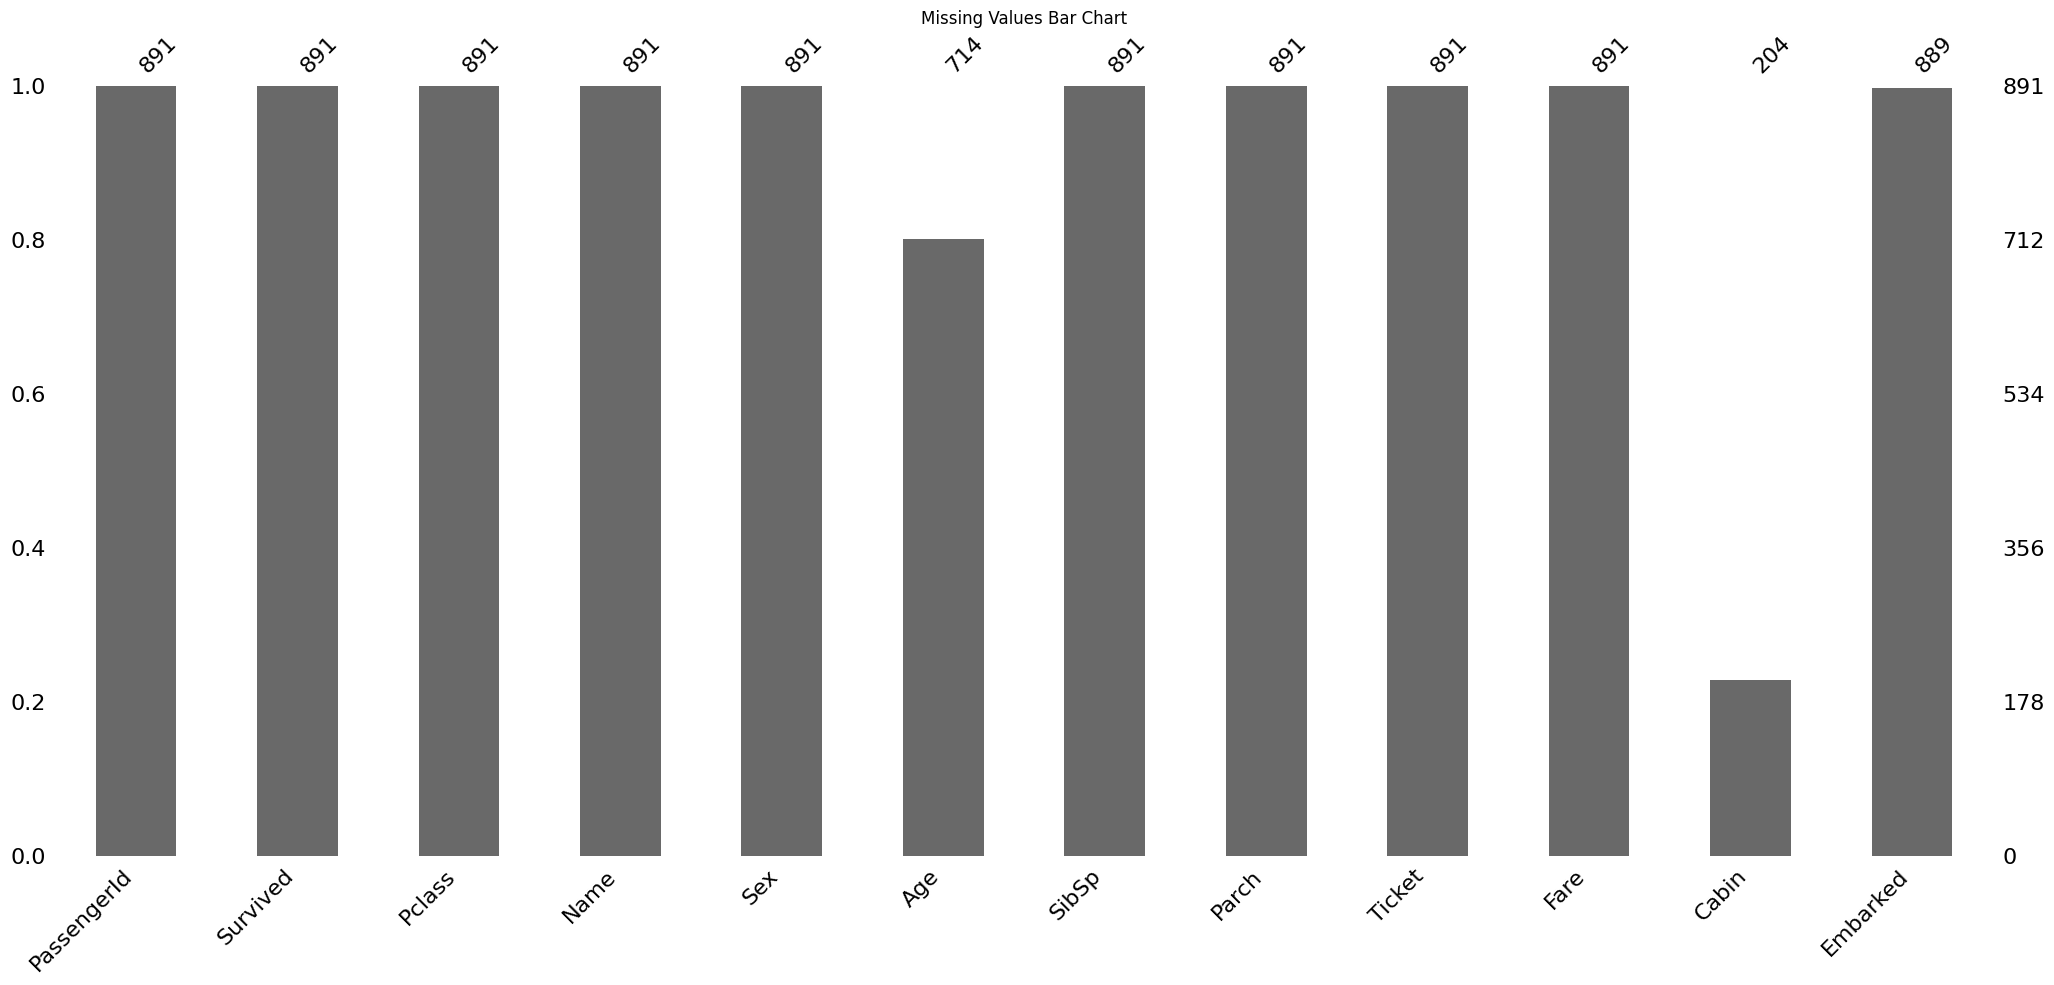

<Figure size 1000x800 with 0 Axes>

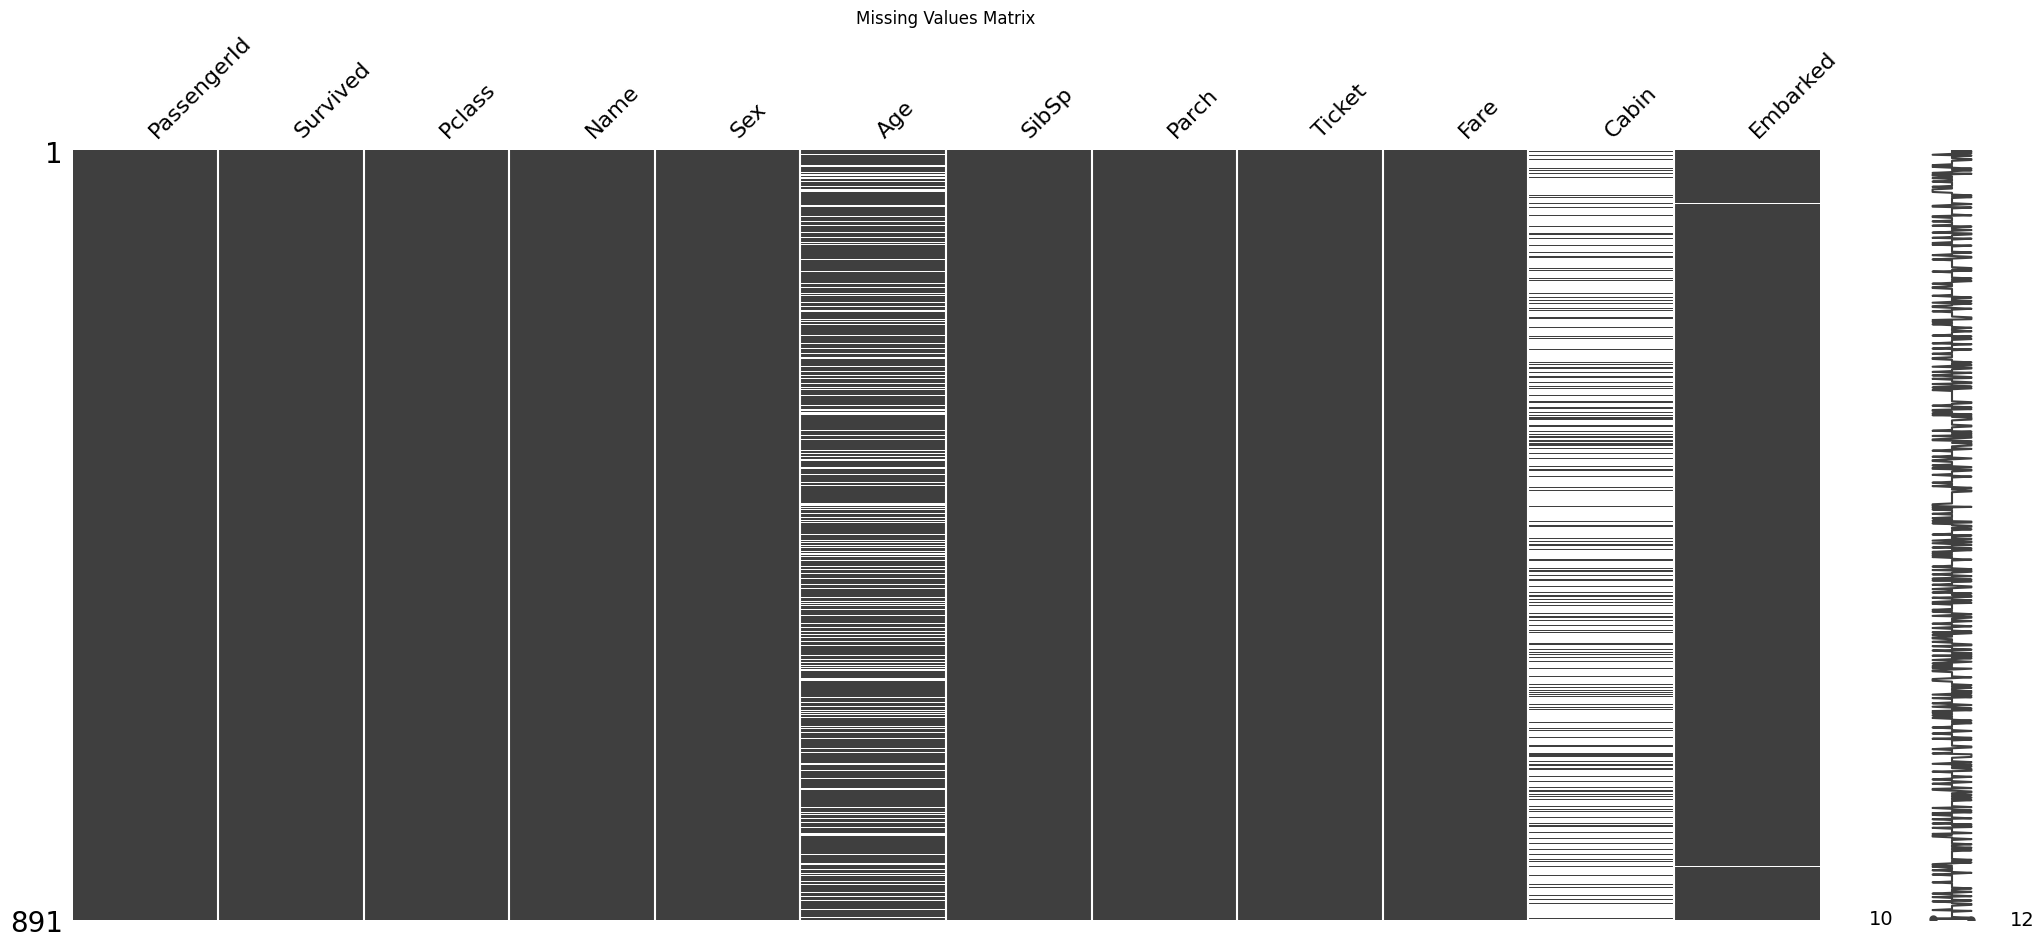

In [12]:
import missingno as msno
import seaborn as sns
from matplotlib import pyplot as plt

print(df.info())

plt.figure(figsize=(8, 6))
msno.bar(df)
plt.title('Missing Values Bar Chart')
plt.show()

plt.figure(figsize=(10, 8))
msno.matrix(df)
plt.title('Missing Values Matrix')
plt.show()

## 4. Create a copy of the dataframe. Drop rows which contain any Nan or missing value in fare column.

In [13]:
y=df.copy()
y.head()
y.dropna(subset=['Fare'], inplace=True)
print(y.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


## 5. Replace the missing value in the column cabin with the most frequent value. 

In [14]:
mostfrequentdata=y['Cabin'].mode()
y['Cabin'].fillna(mostfrequentdata)
y

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 6. Replace missing values in the 'Embarked' column with the most common class. 

In [15]:
mfd=y['Embarked'].mode()
y['Embarked'].fillna(mfd)
y

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 7. KNN Imputer: K-Nearest Neighbors Imputer (KNN Imputer) is a technique for imputing or filling in missing values in a dataset using the K-Nearest Neighbors algorithm. It works by identifying the K nearest data points with complete information (i.e., non-missing values) for each data point with missing values and then imputing the missing values based on the values of those nearest neighbors

Make use of the above KNNimputer to impute missing values in age column. 

In [16]:
import pandas as pd
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

y['Age'] = imputer.fit_transform(y[['Age']])
print(y.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


## 8. Multivariate  feature  imputation: Multivariate  feature  imputation  also  known  as multivariate imputation, is a technique for imputing missing values in a dataset by taking into  account  relationships  between  multiple  features  (variables).  Unlike  univariate imputation,  which  considers  each  variable  independently,  multivariate  imputation leverages the relationships between variables to make more informed imputations. from sklearn.experimental import enable_iterative_imputer from sklearn.impute import IterativeImputer train_mice = train.copy(deep=True) mice_imputer = IterativeImputer() train_mice['Age'] = mice_imputer.fit_transform(train_mice[['Age']]) In the above code enable_iterative_imputer is used to enable the IterativeImputer,. A deep copy of the 'train' DataFrame is created, named 'train_mice'. A deep copy ensures that you're working with a new DataFrame that won't affect the original 'train' DataFrame. An instance of IterativeImputer is created as 'mice_imputer'. This imputer will be used to impute missing values in the 'Age' column.mice_imputer.fit_transform(train_mice[['Age']])  imputes  missing  values  in  the 'Age' column by considering the relationships with other features in the DataFrame. The resulting imputed values are assigned to the 'Age' column of the 'train_mice' DataFrame. This code updates the 'Age' column in 'train_mice' with imputed values based on the IterativeImputer's predictions. After running this code, the 'train_mice' DataFrame will have the missing values in the 'Age' column filled with imputed values. By making use of multivariate feature imputation impute the missing values in the column body.

In [17]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

train_mice = y.copy(deep=True)

mice_imputer = IterativeImputer()

train_mice['Age'] = mice_imputer.fit_transform(train_mice[['Age']])

print(train_mice)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886 

## 9. Imputation for Categorical Data 

### a. Generate a categorical dataset as per below code 

data = {"X1": [np.nan, "Red" , "Blue", "Red", np.nan,         "Red", "Green", np.nan, "Blue", "Red"],         "X2": ["Green", "Green", "Red", "Blue", "Green" ,         "Blue" , np.nan, "Red", "Green", np.nan ]} colors = pd.DataFrame(data) print(colors) 

In [18]:
import numpy as np
import pandas as pd

data = {
    "X1": [np.nan, "Red", "Blue", "Red", np.nan, "Red", "Green", np.nan, "Blue", "Red"],
    "X2": ["Green", "Green", "Red", "Blue", "Green", "Blue", np.nan, "Red", "Green", np.nan]
}

colors = pd.DataFrame(data)
print(colors)

      X1     X2
0    NaN  Green
1    Red  Green
2   Blue    Red
3    Red   Blue
4    NaN  Green
5    Red   Blue
6  Green    NaN
7    NaN    Red
8   Blue  Green
9    Red    NaN


### b. Imputation Method 1: Most Common Class 

In [19]:
df_most_common_imputed = colors.apply(lambda x: x.fillna(x.value_counts().idxmax()))
print(df_most_common_imputed)

      X1     X2
0    Red  Green
1    Red  Green
2   Blue    Red
3    Red   Blue
4    Red  Green
5    Red   Blue
6  Green  Green
7    Red    Red
8   Blue  Green
9    Red  Green


### c. Frequent Categorical Imputation[Mode Imputation]

In [21]:
for column in colors.columns:
    mode_value = colors[column].mode()[0]
    colors[column].fillna(mode_value, inplace=True)

print(colors)

      X1     X2
0    Red  Green
1    Red  Green
2   Blue    Red
3    Red   Blue
4    Red  Green
5    Red   Blue
6  Green  Green
7    Red    Red
8   Blue  Green
9    Red  Green


# Exercise III Remove Noise from Data 

## 1. Load the dataset Cupcake.csv 

In [22]:
import pandas as pd

In [23]:
df = pd.read_csv("./cupcake.csv")

In [24]:
df

,Mese,Cupcake
0,2004-01,5
1,2004-02,5
2,2004-03,4
3,2004-04,6
4,2004-05,5
...,...,...
199,2020-08,47
200,2020-09,44
201,2020-10,49
202,2020-11,44


## 2. Apply binning by distance: Binning by distance is a technique used in data analysis and statistics to group data points into discrete bins or intervals based on their proximity or distance from a reference point. For the cupcake dataset perform noise removal using binning by distance technique. For that, perform the following steps: 

### a. Find the minimum and maximum values in the "Cupcake" column using the min()and max() functions

In [25]:
min_val = df['Cupcake'].min()
max_val = df['Cupcake'].max()
print(min_val)
print(max_val)

4
100


### b. Use the linspace() function of the numpy package to calculate the 4 bins, equally distributed.

In [26]:
bins = np.linspace(min_val, max_val, 4)
bins

array([  4.,  36.,  68., 100.])

### c. Define the labels as ‘small’, medium’ and ‘big’ 

In [27]:
labels = ['small', 'medium', 'big']

### d. Use the Pandas cut function to convert the numeric values of the column Cupcake into the categorical values. Specify the bins and the labels. In addition, we set the parameter include_lowest to True in order to include also the minimum value.

In [28]:
df['Cupcake_binned_distance'] = pd.cut(df['Cupcake'], bins=bins, labels=labels, include_lowest=True)

### e. Plot  the  distribution  of  values,  by  using  the  hist()  function  of  the  matplotlib package. 

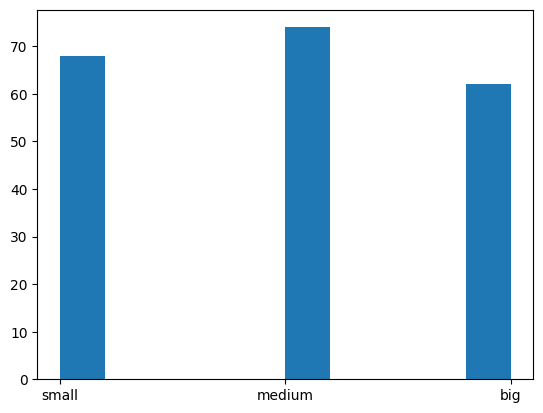

In [29]:
plt.hist(df['Cupcake_binned_distance'])
plt.show()

## 3. Apply binning by frequency: Binning by frequency calculates the size of each bin so that each bin contains the (almost) same number of observations, but the bin range will vary.Perform binning by frequency on cupcake dataset.  (Use the Python pandas qcut() function)

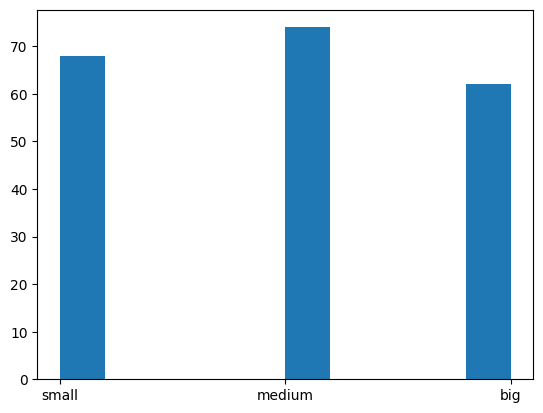

In [30]:
df['Cupcake_binned_frequency'] = pd.qcut(df['Cupcake'], q=4)

plt.hist(df['Cupcake_binned_distance'])
plt.show()

## 4. Sampling: Sampling is another technique of data binning. It permits to reduce the number of samples, by grouping similar values or contiguous values. There are three approaches to perform sampling:

In [31]:
from scipy.stats import binned_statistic
bins = np.linspace(min_val, max_val, 5)
def set_to_mean(x):
    bin_means, _, _ = binned_statistic(x, x, statistic='mean', bins=bins)
    return bin_means
def set_to_median(x):
    bin_medians, _, _ = binned_statistic(x, x, statistic='median', bins=bins)
    return bin_medians
def set_to_boundary(x):
    bin_boundaries, _, _ = binned_statistic(x, x, statistic='max', bins=bins)
    return bin_boundaries

In [32]:
from scipy.stats import binned_statistic

def replace_by_bin_means(x_data, y_data, num_bins):
    bin_means, bin_edges, _ = binned_statistic(x_data, y_data, statistic='mean', bins=num_bins)
    bin_indices = np.digitize(x_data, bin_edges)
    return np.array([bin_means[idx - 1] if 0 < idx <= len(bin_means) else np.nan for idx in bin_indices])

def replace_by_bin_medians(x_data, y_data, num_bins):
    bin_medians, bin_edges, _ = binned_statistic(x_data, y_data, statistic='median', bins=num_bins)
    bin_indices = np.digitize(x_data, bin_edges)
    return np.array([bin_medians[idx - 1] if 0 < idx <= len(bin_medians) else np.nan for idx in bin_indices])

num_bins = 10

df['Cupcake_Bin_Mean'] = replace_by_bin_means(df['Cupcake'], df['Cupcake'], num_bins)

df['Cupcake_Bin_Median'] = replace_by_bin_medians(df['Cupcake'], df['Cupcake'], num_bins)


df

,Mese,Cupcake,Cupcake_binned_distance,Cupcake_binned_frequency,Cupcake_Bin_Mean,Cupcake_Bin_Median
0,2004-01,5,small,"(3.999, 25.0]",8.444444,8.0
1,2004-02,5,small,"(3.999, 25.0]",8.444444,8.0
2,2004-03,4,small,"(3.999, 25.0]",8.444444,8.0
3,2004-04,6,small,"(3.999, 25.0]",8.444444,8.0
4,2004-05,5,small,"(3.999, 25.0]",8.444444,8.0
...,...,...,...,...,...,...
199,2020-08,47,medium,"(25.0, 50.0]",47.142857,47.0
200,2020-09,44,medium,"(25.0, 50.0]",47.142857,47.0
201,2020-10,49,medium,"(25.0, 50.0]",47.142857,47.0
202,2020-11,44,medium,"(25.0, 50.0]",47.142857,47.0


In [33]:
def set_to_boundary(value):

    return value

num_bins = 10

df['Cupcake_Bin_Boundary'] = pd.cut(df['Cupcake'], bins=num_bins, labels=False)
df['Cupcake_Bin_Boundary'] = df['Cupcake_Bin_Boundary'].apply(lambda x: set_to_boundary(x) if not pd.isnull(x) else np.nan)


# Extra Credit Exercise (Optional):  

Impute the missing values in the titanic dataset for the column age using KNN based imputer, without using default library function. Write an algorithm from scratch to implement k-nn and then use the predictions to impute the missing values. 

In [34]:

titanic_data = pd.read_csv('titanic_dataset.csv')

def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

def knn(data, query, k=5):
    distances = [euclidean_distance(query, datapoint) for datapoint in data]
    nearest_neighbors = np.argsort(distances)[:k]
    return nearest_neighbors

def impute_age_knn(data, k=5):
    imputed_data = data.copy()
    for i, age in enumerate(imputed_data['Age']):
        if np.isnan(age):
            non_missing_indices = np.where(~np.isnan(imputed_data['Age']))[0]
            nearest_neighbors = knn(imputed_data.loc[non_missing_indices, 'Age'].values.reshape(-1, 1), np.array([age]), k)
            nearest_ages = imputed_data.loc[non_missing_indices[nearest_neighbors], 'Age']
            imputed_data.at[i, 'Age'] = np.mean(nearest_ages)
    return imputed_data

titanic_data_imputed = impute_age_knn(titanic_data, k=5)

print(titanic_data_imputed['Age'])

0      22.0000
1      38.0000
2      26.0000
3      35.0000
4      35.0000
        ...   
886    27.0000
887    19.0000
888    35.3248
889    26.0000
890    32.0000
Name: Age, Length: 891, dtype: float64
